In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
import statsmodels.api as sm
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc




In [3]:
df=pd.read_csv('bankloan.csv')

In [5]:
df=pd.DataFrame(df)

In [6]:
df.shape

(700, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [8]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [9]:
df.head(4)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.36,5.01,1
1,27,1,10,6,31,17.3,1.36,4.00,0
2,40,1,15,14,55,5.5,0.86,2.17,0
3,41,1,15,14,120,2.9,2.66,0.82,0


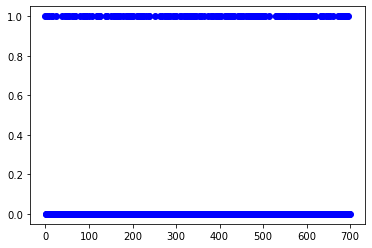

In [10]:
plt.plot(df.default,'bo')

In [11]:
df1=df.drop(['address', 'ed', 'debtinc','employ'], 1)

In [12]:
df1.head()

,age,income,creddebt,othdebt,default
0,41,176,11.36,5.01,1
1,27,31,1.36,4.00,0
2,40,55,0.86,2.17,0
3,41,120,2.66,0.82,0
4,24,28,1.79,3.06,1


In [14]:
df1.shape

(700, 5)

In [23]:
x=df1.iloc[:, [0,1,2,3]]

In [24]:
x.head(3)

,age,income,creddebt,othdebt
0,41,176,11.36,5.01
1,27,31,1.36,4.00
2,40,55,0.86,2.17


In [26]:
x.shape

(700, 4)

In [27]:
y=df1.iloc[:, 4]

In [28]:
y.shape

(700,)

In [29]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: default, dtype: int64

In [31]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.4, random_state=0)

In [32]:
# building model on training set

In [34]:
svc=svm.SVC(kernel='linear', C=1, gamma='auto', probability=True).fit(x_train, y_train)

In [35]:
print(svc)

SVC(C=1, gamma='auto', kernel='linear', probability=True)


In [36]:
y_pred=svc.predict(x_test)

In [37]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [39]:
confusion_matrix= confusion_matrix(y_test, y_pred)

In [40]:
confusion_matrix

array([[194,  12],
       [ 60,  14]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       206
           1       0.54      0.19      0.28        74

    accuracy                           0.74       280
   macro avg       0.65      0.57      0.56       280
weighted avg       0.70      0.74      0.69       280



In [42]:
#ROC curve

In [43]:
preds1=svc.predict_proba(x_test)[:, 1]

In [44]:
preds1

array([0.19038976, 0.57145313, 0.2378493 , 0.71610868, 0.23434243,
       0.20127456, 0.47954582, 0.29363665, 0.07605323, 0.05301848,
       0.09065017, 0.21981765, 0.15521662, 0.18971995, 0.33343702,
       0.10844493, 0.15346933, 0.03804142, 0.50990682, 0.09024973,
       0.14164737, 0.4776121 , 0.22291689, 0.11962223, 0.28885534,
       0.17565805, 0.28235109, 0.19263542, 0.56649774, 0.37110844,
       0.26782538, 0.27690864, 0.19233419, 0.51518277, 0.13648297,
       0.17358467, 0.08767143, 0.42111296, 0.08457156, 0.34445688,
       0.12420448, 0.18863017, 0.15824011, 0.09291887, 0.29432757,
       0.36295763, 0.25657684, 0.14022781, 0.20262731, 0.22995479,
       0.35502299, 0.17806317, 0.20841821, 0.64285026, 0.28801205,
       0.27377806, 0.1695146 , 0.05031636, 0.43473637, 0.14971488,
       0.1322634 , 0.28503064, 0.18718455, 0.76092463, 0.21798897,
       0.20593397, 0.48027665, 0.168834  , 0.23084819, 0.1328173 ,
       0.18509129, 0.21586264, 0.31454656, 0.18601408, 0.21269

In [45]:
preds1.shape

(280,)

In [46]:
fpr1, tpr1, thresholds1=metrics.roc_curve(y_test, preds1)

In [47]:
fpr1

array([0.        , 0.        , 0.        , 0.00970874, 0.00970874,
       0.01456311, 0.01456311, 0.02427184, 0.02427184, 0.02912621,
       0.02912621, 0.04368932, 0.04368932, 0.04854369, 0.04854369,
       0.0631068 , 0.0631068 , 0.07281553, 0.07281553, 0.0776699 ,
       0.0776699 , 0.08252427, 0.08252427, 0.10194175, 0.10194175,
       0.12135922, 0.12135922, 0.15048544, 0.15048544, 0.15533981,
       0.15533981, 0.17961165, 0.17961165, 0.18446602, 0.18446602,
       0.19417476, 0.19417476, 0.20873786, 0.20873786, 0.23300971,
       0.23300971, 0.23786408, 0.23786408, 0.24271845, 0.24271845,
       0.25728155, 0.25728155, 0.29126214, 0.29126214, 0.2961165 ,
       0.2961165 , 0.30097087, 0.30097087, 0.30582524, 0.30582524,
       0.41747573, 0.41747573, 0.45145631, 0.45145631, 0.45631068,
       0.45631068, 0.48058252, 0.48058252, 0.49029126, 0.49029126,
       0.49514563, 0.49514563, 0.50485437, 0.50485437, 0.52912621,
       0.52912621, 0.55339806, 0.55339806, 0.55825243, 0.55825

In [48]:
tpr1

array([0.        , 0.01351351, 0.05405405, 0.05405405, 0.06756757,
       0.06756757, 0.10810811, 0.10810811, 0.12162162, 0.12162162,
       0.16216216, 0.16216216, 0.17567568, 0.17567568, 0.18918919,
       0.18918919, 0.2027027 , 0.2027027 , 0.22972973, 0.22972973,
       0.24324324, 0.24324324, 0.27027027, 0.27027027, 0.31081081,
       0.31081081, 0.33783784, 0.33783784, 0.36486486, 0.36486486,
       0.40540541, 0.40540541, 0.41891892, 0.41891892, 0.5       ,
       0.5       , 0.51351351, 0.51351351, 0.54054054, 0.54054054,
       0.55405405, 0.55405405, 0.56756757, 0.56756757, 0.58108108,
       0.58108108, 0.59459459, 0.59459459, 0.60810811, 0.60810811,
       0.62162162, 0.62162162, 0.63513514, 0.63513514, 0.64864865,
       0.64864865, 0.66216216, 0.66216216, 0.67567568, 0.67567568,
       0.68918919, 0.68918919, 0.7027027 , 0.7027027 , 0.72972973,
       0.72972973, 0.75675676, 0.75675676, 0.77027027, 0.77027027,
       0.78378378, 0.78378378, 0.7972973 , 0.7972973 , 0.81081

In [49]:
thresholds1

array([1.99569352, 0.99569352, 0.96549116, 0.88472787, 0.87657922,
       0.8517597 , 0.76092463, 0.71634056, 0.71610868, 0.71396163,
       0.61231139, 0.59701597, 0.58226547, 0.58038939, 0.57145313,
       0.53838646, 0.5342308 , 0.51518277, 0.5       , 0.48845823,
       0.48665255, 0.48350983, 0.47954582, 0.45552238, 0.43473637,
       0.41648309, 0.40770346, 0.36904984, 0.36351155, 0.36295763,
       0.35502299, 0.33648375, 0.3337217 , 0.33343702, 0.31454656,
       0.30930649, 0.3076465 , 0.30186961, 0.29432757, 0.28801205,
       0.28555656, 0.28503064, 0.28419788, 0.28235109, 0.28225418,
       0.27520945, 0.27377806, 0.25672616, 0.25657684, 0.25520667,
       0.25391178, 0.25275154, 0.25203301, 0.25150507, 0.24869675,
       0.22395189, 0.22358313, 0.21984342, 0.21981765, 0.21854738,
       0.21798897, 0.21412793, 0.21356706, 0.21175088, 0.21026499,
       0.20983632, 0.20865644, 0.20773916, 0.20768639, 0.20262731,
       0.20127456, 0.19263542, 0.19233419, 0.19155134, 0.19107

In [50]:
df2=pd.DataFrame(dict(fpr=fpr1, tpr=tpr1))

In [51]:
auc= metrics.auc(fpr1, tpr1)

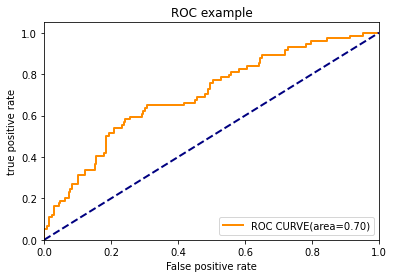

In [54]:
plt.figure()
lw=2
plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label='ROC CURVE(area=%0.2f)' %auc)
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.title('ROC example')
plt.legend(loc='lower right')
plt.show()

In [55]:
pc=pd.read_csv('petrol_consumption.csv')

In [56]:
pc=pd.DataFrame(pc)

In [57]:
pc.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [58]:
pc.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [59]:
#train and test the data

In [60]:
x=pc.iloc[:, 0:4]

In [61]:
y=pc.iloc[:,4]

In [62]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [63]:
len(x_train)

38

In [66]:
#kernel= rbf

In [67]:
from sklearn.svm import SVR

In [69]:
svr_rbf=SVR(kernel='rbf', C=1e3, gamma=0.1)

In [70]:
svr_lin= SVR(kernel='linear', C=1e3)

In [71]:
y_rbf= svr_rbf.fit(x_train,y_train).predict(x_test)

In [72]:
y_rbf

array([583.98421053, 583.98421053, 583.98421053, 583.98421053,
       583.98421053, 583.98421053, 583.98421053, 583.98421053,
       583.98421053, 583.98421053])

In [73]:
y_lin= svr_lin.fit(x_train,y_train).predict(x_test)

In [74]:
y_lin

array([ 1038.72492641, -1816.52494532, -1576.31149894, -1978.31699329,
       -2275.36964828, -1339.50301891, -2891.68660551,  -485.92234045,
        2876.29470867,  3037.37511486])

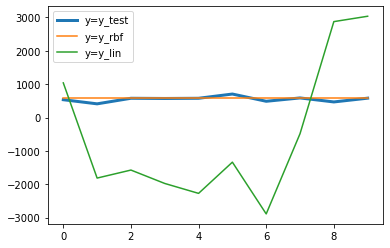

In [79]:
x=np.arange(10)
x
plt.plot(x,y_test,lw=3)
plt.plot(x,y_rbf)
plt.plot(x, y_lin)
plt.legend(['y=y_test', 'y=y_rbf', 'y=y_lin'], loc='upper left')
plt.show()